# Telecome customer churn Analysis & Prediction

### Introduction: 
Churn rate is the percentage of subscribers to a service that discontinue their subscription to that service in a given time period.

Customers are moving to other competitor companies due to below reasons.
- Poor service.
- Availability of features and content.
- Lower cost substitutes from competitors/ better offer from competitor.
- Negative customer service experiences
- Some unkown reasons

### Problem statement
- Reduce customer churn rate
- Analysis high risk customer group(customer group whose churn rate is more comapred to other clusters/customers)
- Predict whether the given customer will churn or not

### Stakeholders: 
- **Telecom company HR team / Higher management / Telecom company business team**
- Customer (To opt for new services)

As here we don't have any information about other telecom companies/ competitors, we will not be able to perform EDA for customer as stakeholder

### Pain point:
- Reduction in company revenue

### Business Metric:
- Reduce churn rate by 5% of current churn rate
- Aquire new customers

### Data science metric: accuracy_score

### Exploratory Data Analysis(EDA)
1. Does age impact churn rate
2. Which service facilities are mostly opted out by customers
3. Does mode of payment has any impact on churn rate
4. Does total services provided vs total charges as any positive impact on churn rate(like more services,less charges/discount)
5. Does gender factor make any difference in churn rate
6. Having dependent impacts churn rate?
7. Contract tenure has any impact on churn rate
8. What are the most profitable service types

### Algorithms used:
1. Logistic regression
2. Random forest
3.AdaBoost
4.XGBoost

In [4]:
# import the modules
import pandas as pd
import numpy as np

#importing liabraries for graphical representation
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.patches as mpatches
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

#Packages for feature engineering
from sklearn.model_selection import train_test_split, StratifiedKFold,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from statsmodels.tools.eval_measures import rmse
from scipy import stats
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
#import catboost as cb
import os
import random
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,\
                            recall_score, f1_score, roc_auc_score, classification_report,\
                            roc_curve, auc
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [7]:
# Code starts here
df = pd.read_csv('train.csv')
df.head(5)
# Code ends here

,Id,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1370,7596-IIWYC,Female,0,No,No,27,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.25,538.2,No
1,5676,9103-CXVOK,Male,0,Yes,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.75,19.75,No
2,5800,7129-CAKJW,Female,0,No,No,17,Yes,Yes,Fiber optic,...,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),80.05,1345.65,No
3,1645,9490-DFPMD,Female,1,No,No,42,Yes,Yes,Fiber optic,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.65,3541.35,Yes
4,366,9069-LGEUL,Male,0,Yes,No,23,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),59.95,1406,No


In [8]:
df.dtypes

Id                    int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
# get the churn count 
df["Churn"].value_counts()

No     4120
Yes    1514
Name: Churn, dtype: int64

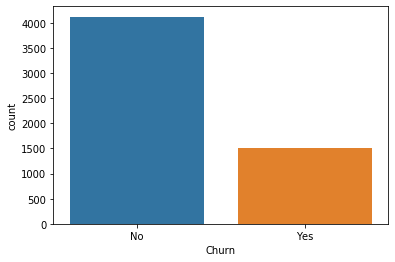

In [10]:
# visualize the count of coustmer churn
sns.countplot(df['Churn'])

 **Insights**:

Target variable churn rate is baised. so in ordere to balance data we need to use undersampling  and oversampling technique

**Recommendation**

Even though the Churn Rate is not high, but we need to take necessary action in order to reduce it.

### Visualize the data

- Replace the missing values and modify some column values(as required by you).
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Clean the data, apply some data preprocessing and engineering techniques.

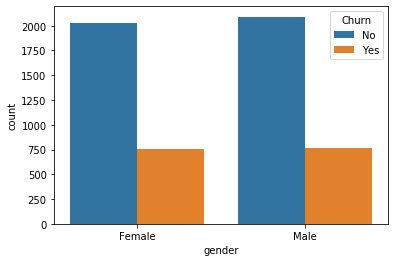

In [11]:
# visualize the churn count  for both male and females
sns.countplot(x='gender',hue='Churn',data=df)

**Insights**: Gender doesn't really have any impact on churn rate.

**Recommendation**:We need to focus on both the Genders. No specific Gender should be prioritised.

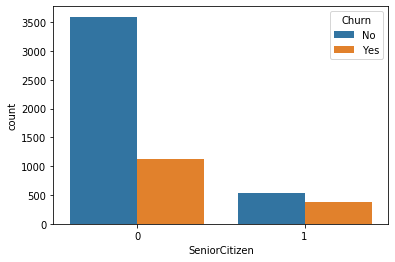

In [12]:
# visualize the churn count for SeniorCitizen
sns.countplot(x='SeniorCitizen',hue='Churn',data=df)

**Insight**: Churn Rate for Senior Citizen is less than Non Senior Citizen.

**Recommendation**: Less focus should be given to Senior Citizen.

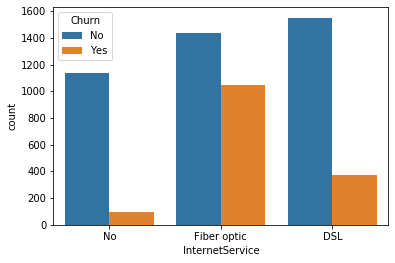

In [13]:
# visualize the churn count of internet services

sns.countplot(x='InternetService',hue='Churn',data=df)

**Insight** : Customer having Fiber optic Internet Service tends to have higher Churn rate compared to DSL Internet Service.

**Recommendation**: Company needs to check with the service provided by Fiber Optic Internet Service and take necessary action in case of any service issues.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D087826B48>,
      dtype=object)

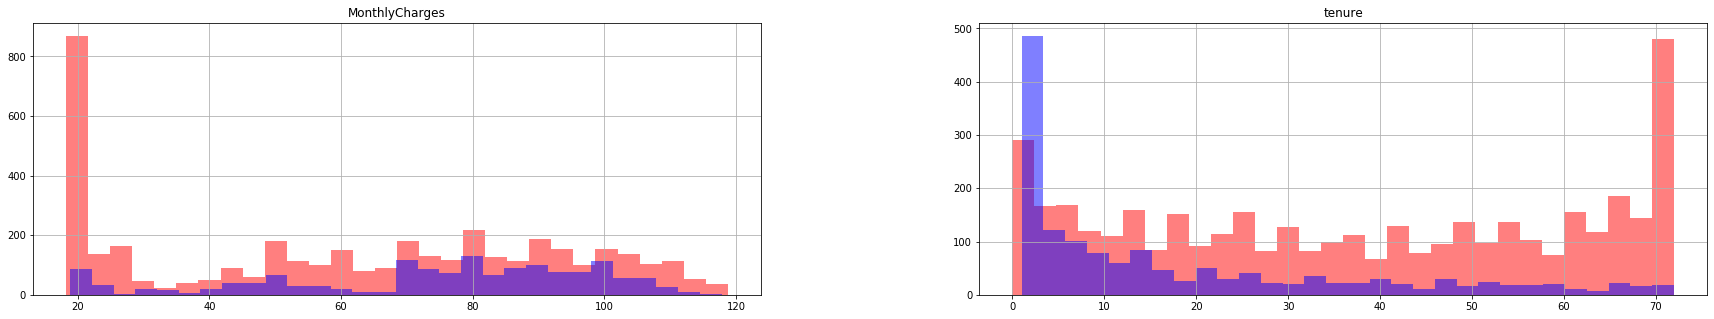

In [14]:
numeric_featured = ['tenure','MonthlyCharges']
fig , ax=plt.subplots (1,2 , figsize=(30,5))
df[df.Churn == 'No'][numeric_featured].hist(bins=30 , color='red',alpha=0.5 ,ax=ax)
df[df.Churn == 'Yes'][numeric_featured].hist(bins=30 , color='blue',alpha=0.5 ,ax=ax)

**Insight**

**Tennure**: If the Tenure is low, then there are high chances of Customer leaving and if the Tenure is high, then there are high chances of Customer staying.

**Monthly Charges** : When the Monthly charges are more than 70, then the Customer Churn Rate is high.

**Recommandation**

**Tennure** :Try to provide Customer Packages with long Tenure.

**Monthly Charges** : If we keep Monthly charges less than 70, then there are high chances of Customer staying.
Keep Monthly charges less than 70 in order to acquire new Customers.


In [15]:
df['PaymentMethod'].value_counts()

Electronic check             1906
Mailed check                 1295
Bank transfer (automatic)    1244
Credit card (automatic)      1189
Name: PaymentMethod, dtype: int64

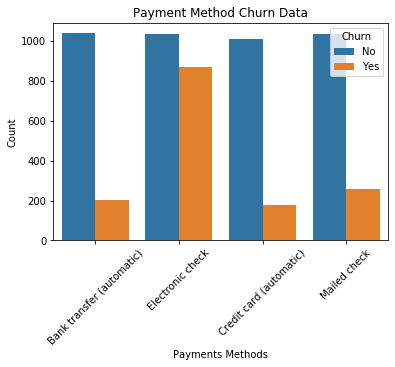

In [16]:
sns.countplot(df['PaymentMethod'],hue=df['Churn'])
plt.xlabel('Payments Methods')
plt.ylabel('Count')
plt.title('Payment Method Churn Data')
plt.xticks(rotation=45 )
plt.show()

**Insight**: 

The most used Payment Method is Electronic check and it has High Churn Rate. 

**Recommendation** : 

Try to make sure the Other Payment Methods are also used more often as it has less Churn Rate compared to Electronic Check.

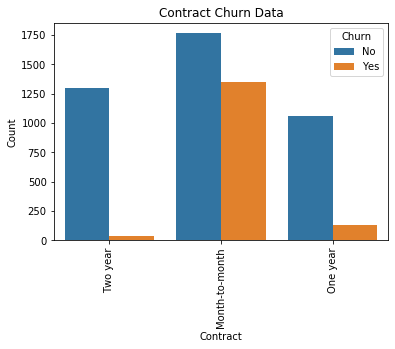

In [17]:
sns.countplot(df['Contract'],hue=df['Churn'])
plt.xlabel('Contract')
plt.ylabel('Count')
plt.title('Contract Churn Data')
plt.xticks(rotation=90)
plt.show()
#0- month to month
#1-one year
#2- two year

**Insight** : Month-to-month contract has high Churn Rate.

**Recommendation**: Provide Customer with packages having one year or two year COntract.

### Model building

- Try to predict the churning of customers using AdaBoost
- Try and implement XGBoost for our customer churn problem and see how it performs in comparision to AdaBoost. Use different techniques you have learned to imporove the performance of the model.
- Try improving upon the `accuracy_score` ([Accuracy Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html))

In [19]:
# drop column which is not requried
df.drop('Id',axis=1,inplace=True)

In [20]:
df.drop('customerID',axis=1,inplace=True)

In [21]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,No,No,27,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.25,538.2,No
1,Male,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.75,19.75,No
2,Female,0,No,No,17,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),80.05,1345.65,No
3,Female,1,No,No,42,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.65,3541.35,Yes
4,Male,0,Yes,No,23,Yes,No,DSL,Yes,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),59.95,1406,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,Male,0,Yes,Yes,68,Yes,Yes,DSL,No,Yes,Yes,Yes,No,Yes,One year,Yes,Bank transfer (automatic),75.80,5293.95,Yes
5630,Female,0,Yes,Yes,65,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9,No
5631,Male,0,No,No,24,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,89.85,2165.05,Yes
5632,Female,0,Yes,No,1,Yes,No,DSL,No,No,No,No,Yes,No,Month-to-month,No,Mailed check,55.20,55.2,Yes


## FEATURE ENGINEERING

In [22]:
# Code Starts here
# covert all catogorical data into numeric data
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform(df[column])



# Code ends here

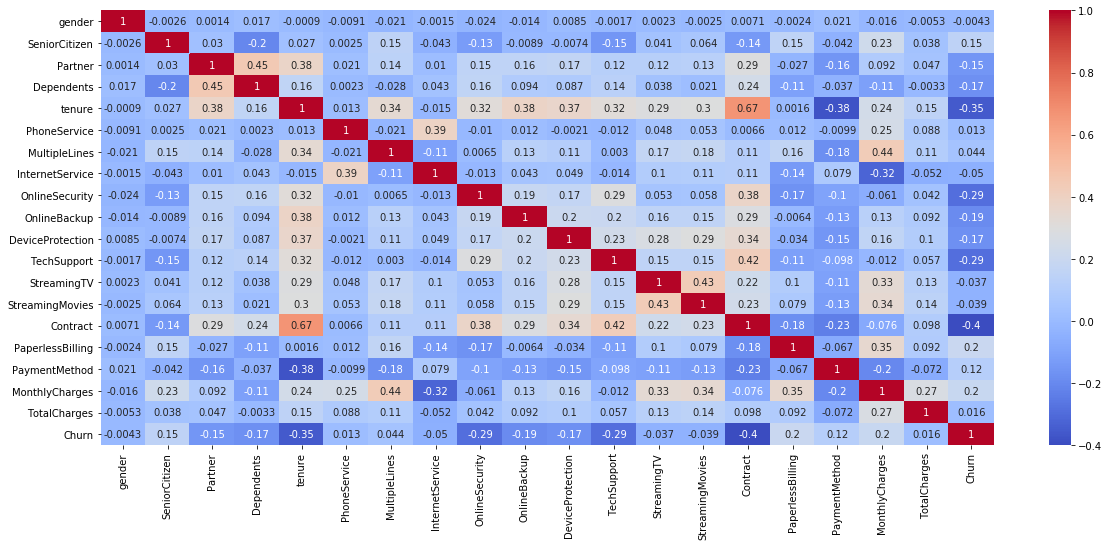

In [23]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)

In [69]:
import time as time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier

In [70]:
from imblearn.over_sampling import SMOTE, RandomOverSampler, SMOTENC, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [71]:
t0 = time.time()
X = df.drop('Churn',1)
y = df.Churn

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0, test_size = 0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(random_state = 0)

model.fit(X_train, y_train)

pred = model.predict(X_test)

t1 = time.time()

print('Time Taken:', t1-t0)
print('Accuracy:', accuracy_score(y_test, pred))
print('Precision:', precision_score(y_test, pred))
print('Recall:', recall_score(y_test, pred))
print('Confusion Matrix:', confusion_matrix(y_test, pred))

Time Taken: 1.029287576675415
Accuracy: 0.7888198757763976
Precision: 0.6186440677966102
Recall: 0.4965986394557823
Confusion Matrix: [[743  90]
 [148 146]]


In [73]:
t0 = time.time()
X = df.drop('Churn',1)
y = df.Churn

sm = RandomOverSampler(random_state=0)
X_res, y_res = sm.fit_resample(X, y)

X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,random_state = 0, test_size = 0.1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(random_state = 0, criterion = 'entropy')

model.fit(X_train, y_train)

pred = model.predict(X_test)

t1 = time.time()

print('Time Taken:', t1-t0)
print('Accuracy:', accuracy_score(y_test, pred))
print('Precision:', precision_score(y_test, pred))
print('Recall:', recall_score(y_test, pred))
print('Confusion Matrix:', confusion_matrix(y_test, pred))

Time Taken: 1.7953886985778809
Accuracy: 0.8919902912621359
Precision: 0.8429203539823009
Recall: 0.9548872180451128
Confusion Matrix: [[354  71]
 [ 18 381]]


In [74]:
from sklearn.model_selection import cross_val_score
from tqdm import tqdm

100%|██████████| 100/100 [00:06<00:00, 15.02it/s]


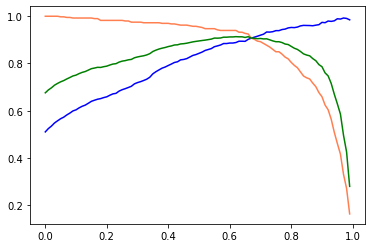

In [75]:
precision = []
recall = []
f1score = []
for threshold in tqdm(np.array(range(100))/100):
    predictions = model.predict_proba(X_test)[:,1]
    predictions = (predictions > threshold).astype(int)
    
    precision.append(precision_score(y_test, predictions))
    recall.append(recall_score(y_test, predictions)) 
    f1score.append(f1_score(y_test, predictions))

sns.lineplot(x = np.array(range(100))/100, y = precision, color = 'blue')
sns.lineplot(x = np.array(range(100))/100, y = recall,color = 'coral')
sns.lineplot(x = np.array(range(100))/100, y = f1score,color = 'green')

In [76]:
predictions = model.predict_proba(X_test)[:,1]
predictions = (predictions > 0.98).astype(int)

print(precision_score(y_test, predictions))
print(recall_score(y_test, predictions))
print(f1_score(y_test, predictions))
print(accuracy_score(y_test, predictions))

0.9908256880733946
0.2706766917293233
0.42519685039370075
0.6456310679611651


In [40]:
# # split the data into (80%)train and (20%)test
# from sklearn.model_selection import train_test_split

# x_train ,x_test ,y_train, y_test = train_test_split(x , y ,test_size =0.2, random_state=42)
# print(y_train)

In [36]:
# # Spot Check Algorithms
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier


# models = []
# models.append(('LR', LogisticRegression()))
# models.append(('XGB', XGBClassifier()))
# models.append(('ADA', AdaBoostClassifier()))
# models.append(('RF', RandomForestClassifier()))
# # evaluate each model in turn
# results = []
# names = []
# for name, model in models:
# 	kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
# 	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
# 	results.append(cv_results)
# 	names.append(name)
# 	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

In [37]:
# #Applying SMOTE(OverSampling Technique) on RF
# smt = SMOTE()
# X_train, y_train = smt.fit_sample(x_train, y_train)

In [38]:
# #both having equal amount of records
# np.bincount(y_train)

In [39]:
# models = []
# models.append(('LR', LogisticRegression()))
# models.append(('XGB', XGBClassifier()))
# models.append(('ADA', AdaBoostClassifier()))
# models.append(('RF', RandomForestClassifier()))
# # evaluate each model in turn
# results = []
# names = []
# for name, model in models:
# 	kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
# 	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
# 	results.append(cv_results)
# 	names.append(name)
# 	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

In [91]:
# split the data into (80%)train and (20%)test
from sklearn.model_selection import train_test_split

X_train ,X_test ,y_train, y_test = train_test_split(x , y ,test_size =0.2, random_state=0)
print(y_train)

1867    0
1571    0
5407    0
5047    1
3528    0
       ..
4931    0
3264    0
1653    0
2607    1
2732    1
Name: Churn, Length: 4507, dtype: int32


In [95]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
model_x = XGBClassifier()
model_x.fit(X_train, y_train)
preds = model_x.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7950310559006211

In [93]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
result = model_lr.fit(X_train, y_train)
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.7950310559006211


In [99]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
y_pred= model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.7968056787932565


In [104]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
precision_gbc=precision_score(y_test, y_pred_gbc)
print("Precision is ",precision_gbc)
print(classification_report(y_test, y_pred_gbc))

Precision is  0.668
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       816
           1       0.67      0.54      0.60       311

    accuracy                           0.80      1127
   macro avg       0.75      0.72      0.73      1127
weighted avg       0.79      0.80      0.79      1127



precision is : 0.5868725868725869
acuracy is : 0.7639751552795031
recall is : 0.4887459807073955
f1 score is : 0.5333333333333333


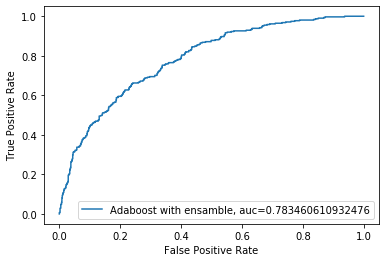

In [106]:
## from sklearn.ensemble import AdaBoostClassifier
adc = AdaBoostClassifier(base_estimator = gbc, n_estimators=100)
adc.fit(X_train, y_train)
y_pred_adc = adc.predict(X_test)
accuracy_en=adc.score(X_test,y_test)
recall_en= recall_score(y_test,y_pred_adc)
precision_en= precision_score(y_test,y_pred_adc)
f1_en= f1_score(y_test,y_pred_adc)

#plots
# plot_cm(adc, y_pred_adc)
#After Sampling    
print("precision is :",precision_en)
print("acuracy is :",accuracy_en)
print("recall is :",recall_en)
print("f1 score is :",f1_en)

# Plot the auc-roc curve
score = roc_auc_score(y_pred_adc , y_test)
y_pred_proba = adc.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Adaboost with ensamble, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

precision is : 0.6029411764705882
acuracy is : 0.7693672383205205
recall is : 0.5189873417721519
f1 score is : 0.5578231292517007


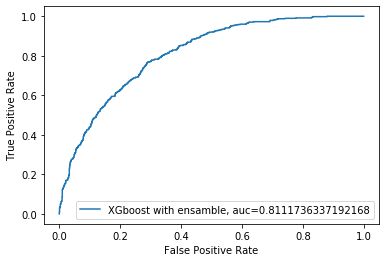

Classification_report rf with normal xgboost
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1217
           1       0.60      0.52      0.56       474

    accuracy                           0.77      1691
   macro avg       0.71      0.69      0.70      1691
weighted avg       0.76      0.77      0.76      1691



In [119]:
#Model 1
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 42, n_jobs = -1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#fit the best models so far
xgb.fit(X_train, y_train)


y_pred_xg = xgb.predict(X_test)
accuracy_xg=xgb.score(X_test,y_test)
recall_xg= recall_score(y_test,y_pred_xg )
precision_xg= precision_score(y_test,y_pred_xg )
f1_xg= f1_score(y_test,y_pred_xg)

# #plots
# plot_cm(xgb, y_pred_xg)
#After Sampling    
print("precision is :",precision_xg)
print("acuracy is :",accuracy_xg)
print("recall is :",recall_xg)
print("f1 score is :",f1_xg)

# Plot the auc-roc curve
score = roc_auc_score(y_pred_xg , y_test)
y_pred_proba = xgb.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="XGboost with ensamble, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()
print('Classification_report rf with normal xgboost' + '\n' + classification_report(y_test,y_pred_xg))

precision is : 0.6245059288537549
acuracy is : 0.7950310559006211
recall is : 0.5374149659863946
f1 score is : 0.5776965265082267


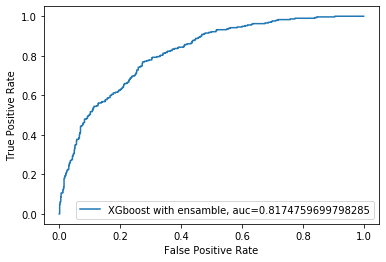

Classification_report rf with normal xgboost
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       833
           1       0.62      0.54      0.58       294

    accuracy                           0.80      1127
   macro avg       0.73      0.71      0.72      1127
weighted avg       0.79      0.80      0.79      1127



In [121]:
#Model 2
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 42, n_jobs = -1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#fit the best models so far
xgb.fit(X_train, y_train)


y_pred_xg = xgb.predict(X_test)
accuracy_xg=xgb.score(X_test,y_test)
recall_xg= recall_score(y_test,y_pred_xg )
precision_xg= precision_score(y_test,y_pred_xg )
f1_xg= f1_score(y_test,y_pred_xg)

# #plots
# plot_cm(xgb, y_pred_xg)
#After Sampling    
print("precision is :",precision_xg)
print("acuracy is :",accuracy_xg)
print("recall is :",recall_xg)
print("f1 score is :",f1_xg)

# Plot the auc-roc curve
score = roc_auc_score(y_pred_xg , y_test)
y_pred_proba = xgb.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="XGboost with ensamble, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()
print('Classification_report rf with normal xgboost' + '\n' + classification_report(y_test,y_pred_xg))

precision is : 0.5663082437275986
acuracy is : 0.7542147293700089
recall is : 0.5031847133757962
f1 score is : 0.5328836424957842


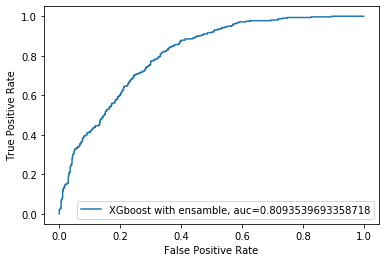

Classification_report rf with normal xgboost
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       813
           1       0.57      0.50      0.53       314

    accuracy                           0.75      1127
   macro avg       0.69      0.68      0.68      1127
weighted avg       0.75      0.75      0.75      1127



In [122]:
#Final Model 3 which got submited and gave maximum accuracy
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 9, n_jobs = -1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#fit the best models so far
xgb.fit(X_train, y_train)


y_pred_xg = xgb.predict(X_test)
accuracy_xg=xgb.score(X_test,y_test)
recall_xg= recall_score(y_test,y_pred_xg )
precision_xg= precision_score(y_test,y_pred_xg )
f1_xg= f1_score(y_test,y_pred_xg)

# #plots
# plot_cm(xgb, y_pred_xg)
#After Sampling    
print("precision is :",precision_xg)
print("acuracy is :",accuracy_xg)
print("recall is :",recall_xg)
print("f1 score is :",f1_xg)

# Plot the auc-roc curve
score = roc_auc_score(y_pred_xg , y_test)
y_pred_proba = xgb.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="XGboost with ensamble, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()
print('Classification_report rf with normal xgboost' + '\n' + classification_report(y_test,y_pred_xg))

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [50]:
test_data=pd.read_csv('test.csv')
test_data.head()

,Id,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,4539,4355-HBJHH,Male,0,Yes,Yes,67,Yes,Yes,DSL,...,No,Yes,No,Yes,Yes,Two year,Yes,Electronic check,79.70,5293.4
1,1802,7492-TAFJD,Male,0,Yes,Yes,7,No,No phone service,DSL,...,Yes,Yes,No,No,No,Two year,No,Mailed check,38.55,280
2,1380,1131-SUEKT,Male,0,Yes,Yes,61,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),98.45,6145.2
3,5305,9027-TMATR,Female,0,Yes,No,43,Yes,No,DSL,...,No,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,78.80,3460.3
4,1960,5846-QFDFI,Female,0,Yes,Yes,33,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),88.60,2888.7


In [51]:
test_data.drop(['Id'],axis = 1, inplace = True)

In [52]:
test_data.drop(['customerID'],axis = 1, inplace = True)

In [53]:
test=pd.read_csv('test.csv')

In [54]:
id_ = test['Id']

In [55]:
# covert all catogorical data into numeric data
from sklearn.preprocessing import LabelEncoder

for column in test_data.columns:
  if test_data[column].dtype == np.number:
    continue
  test_data[column] = LabelEncoder().fit_transform(test_data[column])

In [62]:
test_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,1,67,1,2,0,2,0,2,0,2,2,2,1,2,79.70,936
1,1,0,1,1,7,0,1,0,2,2,2,0,0,0,2,0,3,38.55,516
2,1,0,1,1,61,1,0,1,0,2,0,2,2,2,1,1,0,98.45,1078
3,0,0,1,0,43,1,0,0,2,0,2,2,2,2,2,1,2,78.80,644
4,0,0,1,1,33,1,2,1,0,2,2,2,0,0,0,0,1,88.60,527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,0,0,1,1,58,0,1,0,0,0,2,2,2,2,2,1,1,55.50,585
1405,0,0,0,0,71,1,2,1,2,2,2,2,2,2,2,1,2,118.65,1317
1406,0,1,0,0,59,1,2,1,0,2,0,0,0,0,2,1,1,79.20,829
1407,1,0,0,0,66,1,0,2,1,1,1,1,1,1,2,0,0,19.70,88


In [65]:
# # # Scaler tranformation
# # from sklearn.preprocessing import StandardScaler 
# test_data = scaler.transform(test_data)

In [123]:
# Code starts here
# Predict on the test data
y_xgb= xgb.predict(test_data)


print(y_xgb)
# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'Churn':y_xgb})

# Convert the sample submission file into a csv file
sample_submission.to_csv('churn_xgb.csv',index=False)

[0 0 0 ... 0 0 0]


In [124]:
# Code Starts here
sample_submission['Churn'].value_counts()

0    1126
1     283
Name: Churn, dtype: int64

In [4]:
# Code Starts here



# Code ends here